Median gap:  1827.0
Locations of long gaps:  []
Times of long gaps:  []
Durations of long gaps:  []


<Figure size 2500x2500 with 0 Axes>

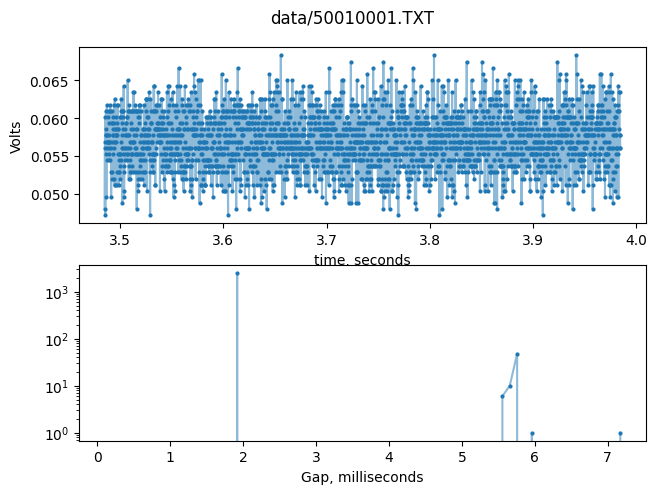

In [1]:
#import matplotlib
#matplotlib.use('TKAgg',force=True)
from matplotlib import pyplot as plt
import numpy as np
import pdb 

def quicklook(infile):
    #read data from file which is the input argument
    
    t,v = np.loadtxt(infile,skiprows=4,unpack=True,delimiter=',')
    v = v*(3.3/4060)
    #Make a list of the time differences (gaps) beween adjacent points:
    dt = t - np.roll(t,1)
    dt = dt[1:]
    print('Median gap: ',np.median(dt))
    h,tax = np.histogram(dt,range=[0,max(dt)],bins=int(max(dt)/100.))

    #print the times, durations,  and positions of the longest gaps:
    w = np.where(dt > 50000.)
    w=w[0]
    print('Locations of long gaps: ',w)
    print('Times of long gaps: ',t[w])
    print('Durations of long gaps: ',dt[w])

    #plot dataset
    plt.figure(num=None,figsize=(25,25) )
    fig, axs = plt.subplots(2)
    fig.tight_layout()
    fig.suptitle(infile)
    fig.subplots_adjust(top=.9)

    axs[0].scatter(t/10e6,v,s=4)
    axs[0].plot(t/10e6,v,alpha=0.5)
    axs[0].set_xlabel('time, seconds')
    axs[0].set_ylabel('Volts')

    #plot histogram of gaps in milliseconds:
    axs[1].plot(tax[1:]/1000.,h,alpha=0.5)
    axs[1].scatter(tax[1:]/1000.,h,s=4)
    axs[1].set_yscale('log')
    axs[1].set_xlabel('Gap, milliseconds')

    # plt.show()   

quicklook("data_21/210010001.TXT") 
quicklook("data_21/210020001.TXT") 
quicklook("data_21/210030001.TXT") 
quicklook("data_21/210040001.TXT") 
quicklook("data_21/210050001.TXT") # issue: this is .5 seconds but it should be a 5s file 